In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [46]:
carpeta="data/gpt3_salida/"

In [47]:
indices_correctos_p=set()
indices_incorrectos_p=set()
indices_correctos=set()
indices_incorrectos=set()

In [48]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [55]:
a=glob.glob("./data/Only_training_hipotesis_salida/pTEST_new_1_0.csv.pickle")
a[0]

'./data/Only_training_hipotesis_salida/pTEST_new_1_0.csv.pickle'

In [56]:
df = pd.read_pickle(a[0])
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, the{the,DET}, firemen{firem...","[NULL{null,PROPN}, the{the,DET}, firefighters{...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.09742787, 0.0111...","[0.05917971, 0.571155, 0.36966527]","[0.0, 0.0, 1.0]",0,1232,neutral,contradiction,...,contradiction_neutral
1,1,"[NULL{null,PROPN}, a{a,DET}, lone{lone,ADJ}, p...","[NULL{null,PROPN}, a{a,DET}, businessman{busin...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.24962977, 0.1649...","[0.5729584, 0.3950848, 0.0319568]","[0.0, 1.0, 0.0]",0,1661,entailment,neutral,...,neutral_entailment
2,2,"[NULL{null,PROPN}, this{this,DET}, man{man,NOU...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.01616...","[0.0035327438, 0.9117529, 0.08471436]","[0.0, 1.0, 0.0]",0,4864,neutral,neutral,...,neutral_neutral
3,3,"[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.0161...","[0.33920893, 0.6571335, 0.003657591]","[1.0, 0.0, 0.0]",0,3086,neutral,entailment,...,entailment_neutral
4,4,"[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, al...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1816948, 0.20971...","[0.04164445, 0.030666724, 0.92768884]","[1.0, 0.0, 0.0]",0,9396,contradiction,entailment,...,entailment_contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13633,13633,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21101676, 0.01119...","[0.032039616, 0.9395012, 0.028459145]","[0.0, 1.0, 0.0]",1,9812,neutral,neutral,NOUN ...,neutral_neutral
13634,13634,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,ADJ}, there{there,ADV}, are{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.011193112, 0.0868...","[0.0153575875, 0.07603051, 0.90861195]","[0.0, 0.0, 1.0]",1,9813,contradiction,contradiction,NOUN...,contradiction_contradiction
13635,13635,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,ADJ}, two{two,NUM}, girls{girl,NOUN...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21120092, 0.01119...","[0.7249473, 0.22226317, 0.052789494]","[1.0, 0.0, 0.0]",1,9814,entailment,entailment,NOUN V...,entailment_entailment
13636,13636,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, someone{someone,NOUN}, is{b...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.19364926, 0.016168319, 0.2539...","[0.7549316, 0.24075498, 0.0043133507]","[1.0, 0.0, 0.0]",1,9816,entailment,entailment,...,entailment_entailment


In [57]:
# Procesar los archivos obtenidos para procesarlos y tener un nuevo archivo de las etiquetas originales vs etiquetas de predicción
for e in a:
    df_prediction=pd.read_pickle(e)
    temp=df_prediction.copy()
    df_prediction.assign(predicted_label="")
    df_prediction.assign(gold_label="")
    for index,strings in temp.iterrows():
        p_e=mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        g_e=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])
        df_prediction.at[index,'predicted_label']=p_e
        df_prediction.at[index,'gold_label']=g_e
df_prediction

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, the{the,DET}, firemen{firem...","[NULL{null,PROPN}, the{the,DET}, firefighters{...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.09742787, 0.0111...","[0.05917971, 0.571155, 0.36966527]","[0.0, 0.0, 1.0]",0,1232,neutral,contradiction,...,contradiction_neutral
1,1,"[NULL{null,PROPN}, a{a,DET}, lone{lone,ADJ}, p...","[NULL{null,PROPN}, a{a,DET}, businessman{busin...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.24962977, 0.1649...","[0.5729584, 0.3950848, 0.0319568]","[0.0, 1.0, 0.0]",0,1661,entailment,neutral,...,neutral_entailment
2,2,"[NULL{null,PROPN}, this{this,DET}, man{man,NOU...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.01616...","[0.0035327438, 0.9117529, 0.08471436]","[0.0, 1.0, 0.0]",0,4864,neutral,neutral,...,neutral_neutral
3,3,"[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.0161...","[0.33920893, 0.6571335, 0.003657591]","[1.0, 0.0, 0.0]",0,3086,neutral,entailment,...,entailment_neutral
4,4,"[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, al...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1816948, 0.20971...","[0.04164445, 0.030666724, 0.92768884]","[1.0, 0.0, 0.0]",0,9396,contradiction,entailment,...,entailment_contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13633,13633,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21101676, 0.01119...","[0.032039616, 0.9395012, 0.028459145]","[0.0, 1.0, 0.0]",1,9812,neutral,neutral,NOUN ...,neutral_neutral
13634,13634,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,ADJ}, there{there,ADV}, are{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.011193112, 0.0868...","[0.0153575875, 0.07603051, 0.90861195]","[0.0, 0.0, 1.0]",1,9813,contradiction,contradiction,NOUN...,contradiction_contradiction
13635,13635,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,ADJ}, two{two,NUM}, girls{girl,NOUN...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21120092, 0.01119...","[0.7249473, 0.22226317, 0.052789494]","[1.0, 0.0, 0.0]",1,9814,entailment,entailment,NOUN V...,entailment_entailment
13636,13636,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, someone{someone,NOUN}, is{b...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.19364926, 0.016168319, 0.2539...","[0.7549316, 0.24075498, 0.0043133507]","[1.0, 0.0, 0.0]",1,9816,entailment,entailment,...,entailment_entailment


# Dividimos el corpus en las parafrasis y sin parafrasis

In [63]:
df_con_p=df[df["Paraphrase"]==1]
df_sin_p=df[df["Paraphrase"]==0]

In [64]:
for index,strings in df_con_p.iterrows():
    if(strings["predicted_label"]==strings["gold_label"]):
        indices_correctos_p.add(strings["Idx"])
    else:
        indices_incorrectos_p.add(strings["Idx"])
for index,strings in df_sin_p.iterrows():
    if(strings["predicted_label"]==strings["gold_label"]):
        indices_correctos.add(strings["Idx"])
    else:
        indices_incorrectos.add(strings["Idx"])

In [65]:
print("Correctos con parafrásis: ",len(indices_correctos_p))
print("Incorrectos con parafrásis: ",len(indices_incorrectos_p))

Correctos con parafrásis:  5496
Incorrectos con parafrásis:  1323


# Accuracy de los datos con parafrase

In [66]:
5496/6819*100

80.59832820061592

In [67]:
print("Correctos sin parafrásis: ",len(indices_correctos))
print("Incorrectos sin parafrásis: ",len(indices_incorrectos))

Correctos sin parafrásis:  5797
Incorrectos sin parafrásis:  1022


# Accuracy de los datos sin parafraseo

In [68]:
5797/6819*100

85.01246517084617

# Queremos identificar que par de <T,H> se infirió correctamente a través del parafraseo de la hipótesis

In [69]:
parafraseo_correctos=indices_correctos_p.difference(indices_correctos)
len(parafraseo_correctos)

173

In [71]:
df_parafraseos_correctos=df[df["Idx"].isin(parafraseo_correctos)]
df_parafraseos_correctos

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
3,3,"[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.0161...","[0.33920893, 0.6571335, 0.003657591]","[1.0, 0.0, 0.0]",0,3086,neutral,entailment,...,entailment_neutral
44,44,"[NULL{null,ADJ}, woman{woman,NOUN}, running{ru...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.2678...","[0.46323124, 0.47502753, 0.061741248]","[1.0, 0.0, 0.0]",0,2022,neutral,entailment,NOUN ...,entailment_neutral
154,154,"[NULL{null,PROPN}, an{an,DET}, old{old,ADJ}, w...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.170...","[0.33229244, 0.43128988, 0.23641773]","[0.0, 0.0, 1.0]",0,6924,neutral,contradiction,...,contradiction_neutral
242,242,"[NULL{null,ADJ}, baby{baby,NOUN}, in{in,ADP}, ...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.181...","[0.044145536, 0.59316313, 0.3626913]","[0.0, 0.0, 1.0]",0,1166,neutral,contradiction,NOUN ...,contradiction_neutral
319,319,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.1088...","[0.52669954, 0.44589797, 0.0274025]","[0.0, 1.0, 0.0]",0,6791,entailment,neutral,NOUN ...,neutral_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13501,13501,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.09413...","[0.019005686, 0.36005303, 0.6209413]","[0.0, 0.0, 1.0]",1,9607,contradiction,contradiction,...,contradiction_contradiction
13530,13530,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.084897816, 0.354...","[0.3781037, 0.39856175, 0.22333455]","[0.0, 1.0, 0.0]",1,9654,neutral,neutral,...,neutral_neutral
13586,13586,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.31997496, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction,...,contradiction_contradiction
13616,13616,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.09277387, 0.101227164, 0.1314...","[0.14467043, 0.24963339, 0.6056962]","[0.0, 0.0, 1.0]",1,9777,contradiction,contradiction,...,contradiction_contradiction


# Estadística 

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
def entropia_f(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)

In [27]:
new_data = {'Idx' : [], 'Texto': [], 'Hipotesis': [],'M_Align':[],'ma_umbral':[],
            'Paraphrase':[],'predicted_label':[],'gold_label':[],'entropia':[]}

#sns.set(rc={'figure.figsize':(20,90)})
#fig,  axes= plt.subplots(9, 2)

for i in parafraseo_correctos:
    j=0
    l_entropia=[]
    temp=df_parafraseos_correctos[df_parafraseos_correctos["Idx"]==i]
    #print(temp.index[0])
    matrizPOS=[]
    idx=temp.at[temp.index[0],"Idx"]
    t=temp.at[temp.index[0],"Text"]
    h=temp.at[temp.index[0],"Hipotesis"]
    matriz=temp.at[temp.index[0],"M_Align"]
    #matrizPOS=temp.at[temp.index[0],"ma_umbral"]
    paraphrase=temp.at[temp.index[0],"Paraphrase"]
    tn=len(t)-1
    hn=len(h)-1
    if(len(t)>41 & len(h)>41):
        tn=41
        hn=41
        matriz_c=matriz[1:tn,1:hn]
    elif(len(t)>41):
        tn=41
        matriz_c=matriz[1:tn,1:hn]
    elif(len(h)>41):
        hn=41
        matriz_c=matriz[1:tn,1:hn]
    else:
        matriz_c=matriz[1:tn,1:hn]
    df_matriz=pd.DataFrame(matriz_c,columns=h[1:hn],index=t[1:tn])
    new_data['entropia'].append(np.array(entropia_f(stats.zscore(matriz_c.T).flatten())))
#    sns.heatmap(ax=axes[j,0],data=df_matriz, center=0, cmap='Blues_r', annot=True)
    #axes[j,0].set(title="Parafraseo: "+str(paraphrase))
    
    predic=temp.at[temp.index[0],"predicted_label"]
    gold=temp.at[temp.index[0],"gold_label"]
    new_data['Idx'].append(idx)
    new_data['Texto'].append(t)
    new_data['Hipotesis'].append(h)
    new_data['M_Align'].append(df_matriz)
    new_data['ma_umbral'].append(matrizPOS)
    new_data['Paraphrase'].append(paraphrase)
    new_data['predicted_label'].append(predic)
    new_data['gold_label'].append(gold)

    idx=temp.at[temp.index[1],"Idx"]
    t=temp.at[temp.index[1],"Text"]
    h=temp.at[temp.index[1],"Hipotesis"]
    matriz=temp.at[temp.index[1],"M_Align"]
    #matrizPOS=temp.at[temp.index[1],"ma_umbral"]
    paraphrase=temp.at[temp.index[1],"Paraphrase"]
    tn=len(t)-1
    hn=len(h)-1
    if(len(t)>41 & len(h)>41):
        tn=41
        hn=41
        matriz_c=matriz[1:tn,1:hn]
    elif(len(t)>41):
        tn=41
        matriz_c=matriz[1:tn,1:hn]
    elif(len(h)>41):
        hn=41
        matriz_c=matriz[1:tn,1:hn]
    else:
        matriz_c=matriz[1:tn,1:hn]
    df_matriz=pd.DataFrame(matriz_c,columns=h[1:hn],index=t[1:tn])
    new_data['entropia'].append(np.array(entropia_f(stats.zscore(matriz_c.T).flatten())))
#    sns.heatmap(ax=axes[j,1],data=df_matriz, center=0, cmap='Blues_r', annot=True)
    #axes[j,1].set(title="Parafraseo: "+str(paraphrase))
    predic=temp.at[temp.index[1],"predicted_label"]
    gold=temp.at[temp.index[1],"gold_label"]
    new_data['Idx'].append(idx)
    new_data['Texto'].append(t)
    new_data['Hipotesis'].append(h)
    new_data['M_Align'].append(df_matriz)
    new_data['ma_umbral'].append(matrizPOS)
    new_data['Paraphrase'].append(paraphrase)
    new_data['predicted_label'].append(predic)
    new_data['gold_label'].append(gold)
    j=j+1
#plt.show()
dfn=pd.DataFrame(new_data)    

/tmp/ipykernel_161021/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_161021/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_161021/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_161021/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(gener

In [72]:
df_test=pd.read_csv("data/salida_p/1/TEST_new_1_0.csv")
df_test

,gold_label,sentence1,sentence2,SET,Parafraseo,Idx
0,contradiction,The firemen and women wearing blue gloves have...,The firefighters are setting a fire.,TEST,False,1232
1,neutral,"A lone person in a long, black trench coat and...",A businessman walks by a closed cafe.,TEST,False,1661
2,neutral,This man dressed in white pants and blue shirt...,A man is getting ready to shovel the snow so h...,TEST,False,4864
3,entailment,"A girl reaches up to kiss a cat, which is sitt...",A girl is showing affection towards a cat.,TEST,False,3086
4,entailment,A boy dressed for summer in a green shirt and ...,A boy alien dressed for summer in a green shir...,TEST,False,9396
...,...,...,...,...,...,...
13633,neutral,Two women are observing something together.,Two women are looking at a flower together.,TEST,True,9812
13634,contradiction,Two women are observing something together.,There are two women standing with their eyes c...,TEST,True,9813
13635,entailment,Two women are observing something together.,Two girls are looking at each other.,TEST,True,9814
13636,entailment,A man in a black leather jacket and a book in ...,Someone is speaking to a classroom.,TEST,True,9816


In [73]:
df_test_p=df_test[df_test["Parafraseo"]==1]
df_test_sin_p=df_test[df_test["Parafraseo"]==0]
df_test_p

,gold_label,sentence1,sentence2,SET,Parafraseo,Idx
6819,neutral,This church choir sings to the masses as they ...,There are cracks in the ceiling.,TEST,True,0
6820,contradiction,This church choir sings to the masses as they ...,Theirs are singing at the baseball game.,TEST,True,2
6821,neutral,"A woman with a green headscarf, blue shirt and...",The two are young.,TEST,True,3
6822,entailment,"A woman with a green headscarf, blue shirt and...",Someone is very happy.,TEST,True,4
6823,neutral,An old man with a package poses in front of an...,An ad for a beer. poses in front of a advertis...,TEST,True,7
...,...,...,...,...,...,...
13633,neutral,Two women are observing something together.,Two women are looking at a flower together.,TEST,True,9812
13634,contradiction,Two women are observing something together.,There are two women standing with their eyes c...,TEST,True,9813
13635,entailment,Two women are observing something together.,Two girls are looking at each other.,TEST,True,9814
13636,entailment,A man in a black leather jacket and a book in ...,Someone is speaking to a classroom.,TEST,True,9816


In [74]:
len(parafraseo_correctos)

173

In [75]:
df_test_gpt2=df_test_p[df_test_p["Idx"].isin(parafraseo_correctos)]
df_test_origin=df_test_sin_p[df_test_sin_p["Idx"].isin(parafraseo_correctos)]
df_test_origin

,gold_label,sentence1,sentence2,SET,Parafraseo,Idx
3,entailment,"A girl reaches up to kiss a cat, which is sitt...",A girl is showing affection towards a cat.,TEST,False,3086
44,entailment,Woman running in a park while listening to music.,A woman jogging in a park.,TEST,False,2022
154,contradiction,An old woman and a young man examine their bin...,A young woman and old man are playing poker.,TEST,False,6924
242,contradiction,Baby in running in over-sized flip-flops.,A young boy is playing with a basketball.,TEST,False,1166
319,neutral,A woman in a white wedding dress is being dres...,A woman got married.,TEST,False,6791
...,...,...,...,...,...,...
6517,neutral,A family with young children sits down outside.,A man and wife sit outside with their children.,TEST,False,2335
6557,neutral,Fireworks light up the night as a man stands o...,The man is throwing a concert outside,TEST,False,3100
6597,contradiction,"A young middle eastern mother in high heels, h...",A woman holding her sleeping son while walking...,TEST,False,1682
6642,neutral,People shopping for vegetables at an outdoor m...,People shopping for veggies at a nice market.,TEST,False,2252


In [76]:
df_test_gpt2

,gold_label,sentence1,sentence2,SET,Parafraseo,Idx
6869,neutral,A snowboarder on a wide plain of snow,Anowmobile in a snowstorm,TEST,True,67
6882,neutral,A child wearing a red top is standing behind a...,A pretty blond child wearing a red top is stan...,TEST,True,85
6956,contradiction,A man and woman are taking a picture of themse...,Two woman having mug shots taken of her while ...,TEST,True,186
7038,neutral,A man in an Alaska sweatshirt stands behind a ...,He is in Alaska.,TEST,True,312
7053,contradiction,Island native fishermen reeling in their nets ...,They bothmale did not go to work today but ins...,TEST,True,330
...,...,...,...,...,...,...
13501,contradiction,A woman in black walks down the street in fron...,Two woman standing staring at a painted mural.,TEST,True,9607
13530,neutral,A golden dog bounds across the snow-covered hill.,A large animal bounds across a snow-covered pl...,TEST,True,9654
13586,contradiction,A man with glasses sitting at a restaurant sta...,The family sits at home waiting for dinner,TEST,True,9735
13616,contradiction,A white duck is spreading its wings while sitt...,Theck kept it's wings intact as they dived int...,TEST,True,9777


In [79]:
df_test_origin.sentence2.to_csv(carpeta+"Hipotesis_originales_para_GPT3.csv")

# generar esas parafrasis y colocarlas en una nueva columan

# Obtener los parafraseos del GPT3.5 con la hipotesis original y crear el corpus para procesarlo con el modelo de inferencia

In [80]:
parapf_GPT3=pd.read_csv(carpeta+"Hipotesis_originales_para_GPT3.csv")
parapf_GPT3

,Unnamed: 0,sentence2,gpt3
0,3,A girl is showing affection towards a cat.,A girl displays affection towards a cat.
1,44,A woman jogging in a park.,A woman is running in a park.
2,154,A young woman and old man are playing poker.,A young woman and an elderly man are engaged i...
3,242,A young boy is playing with a basketball.,A young boy is playing with a basketball.
4,319,A woman got married.,A woman has recently gotten married.
...,...,...,...
168,6517,A man and wife sit outside with their children.,A man and his wife sit outside with their chil...
169,6557,The man is throwing a concert outside,The man organizes an outdoor concert.
170,6597,A woman holding her sleeping son while walking...,A woman holds her sleeping son while walking d...
171,6642,People shopping for veggies at a nice market.,People shop for vegetables at a nice market.


In [81]:
hipotesis_ori=df_test_origin.copy()

In [82]:
hipotesis_ori

,gold_label,sentence1,sentence2,SET,Parafraseo,Idx
3,entailment,"A girl reaches up to kiss a cat, which is sitt...",A girl is showing affection towards a cat.,TEST,False,3086
44,entailment,Woman running in a park while listening to music.,A woman jogging in a park.,TEST,False,2022
154,contradiction,An old woman and a young man examine their bin...,A young woman and old man are playing poker.,TEST,False,6924
242,contradiction,Baby in running in over-sized flip-flops.,A young boy is playing with a basketball.,TEST,False,1166
319,neutral,A woman in a white wedding dress is being dres...,A woman got married.,TEST,False,6791
...,...,...,...,...,...,...
6517,neutral,A family with young children sits down outside.,A man and wife sit outside with their children.,TEST,False,2335
6557,neutral,Fireworks light up the night as a man stands o...,The man is throwing a concert outside,TEST,False,3100
6597,contradiction,"A young middle eastern mother in high heels, h...",A woman holding her sleeping son while walking...,TEST,False,1682
6642,neutral,People shopping for vegetables at an outdoor m...,People shopping for veggies at a nice market.,TEST,False,2252


In [83]:
nuevas_gpt3=hipotesis_ori.copy()

In [84]:
for index,strings in parapf_GPT3.iterrows():
    nuevas_gpt3.at[strings[0],"sentence2"]=strings["gpt3"]
nuevas_gpt3

,gold_label,sentence1,sentence2,SET,Parafraseo,Idx
3,entailment,"A girl reaches up to kiss a cat, which is sitt...",A girl displays affection towards a cat.,TEST,False,3086
44,entailment,Woman running in a park while listening to music.,A woman is running in a park.,TEST,False,2022
154,contradiction,An old woman and a young man examine their bin...,A young woman and an elderly man are engaged i...,TEST,False,6924
242,contradiction,Baby in running in over-sized flip-flops.,A young boy is playing with a basketball.,TEST,False,1166
319,neutral,A woman in a white wedding dress is being dres...,A woman has recently gotten married.,TEST,False,6791
...,...,...,...,...,...,...
6517,neutral,A family with young children sits down outside.,A man and his wife sit outside with their chil...,TEST,False,2335
6557,neutral,Fireworks light up the night as a man stands o...,The man organizes an outdoor concert.,TEST,False,3100
6597,contradiction,"A young middle eastern mother in high heels, h...",A woman holds her sleeping son while walking d...,TEST,False,1682
6642,neutral,People shopping for vegetables at an outdoor m...,People shop for vegetables at a nice market.,TEST,False,2252


# Hipótesis original

In [85]:
hipotesis_ori

,gold_label,sentence1,sentence2,SET,Parafraseo,Idx
3,entailment,"A girl reaches up to kiss a cat, which is sitt...",A girl is showing affection towards a cat.,TEST,False,3086
44,entailment,Woman running in a park while listening to music.,A woman jogging in a park.,TEST,False,2022
154,contradiction,An old woman and a young man examine their bin...,A young woman and old man are playing poker.,TEST,False,6924
242,contradiction,Baby in running in over-sized flip-flops.,A young boy is playing with a basketball.,TEST,False,1166
319,neutral,A woman in a white wedding dress is being dres...,A woman got married.,TEST,False,6791
...,...,...,...,...,...,...
6517,neutral,A family with young children sits down outside.,A man and wife sit outside with their children.,TEST,False,2335
6557,neutral,Fireworks light up the night as a man stands o...,The man is throwing a concert outside,TEST,False,3100
6597,contradiction,"A young middle eastern mother in high heels, h...",A woman holding her sleeping son while walking...,TEST,False,1682
6642,neutral,People shopping for vegetables at an outdoor m...,People shopping for veggies at a nice market.,TEST,False,2252


# GPT2

In [86]:
df_test_gpt2

,gold_label,sentence1,sentence2,SET,Parafraseo,Idx
6869,neutral,A snowboarder on a wide plain of snow,Anowmobile in a snowstorm,TEST,True,67
6882,neutral,A child wearing a red top is standing behind a...,A pretty blond child wearing a red top is stan...,TEST,True,85
6956,contradiction,A man and woman are taking a picture of themse...,Two woman having mug shots taken of her while ...,TEST,True,186
7038,neutral,A man in an Alaska sweatshirt stands behind a ...,He is in Alaska.,TEST,True,312
7053,contradiction,Island native fishermen reeling in their nets ...,They bothmale did not go to work today but ins...,TEST,True,330
...,...,...,...,...,...,...
13501,contradiction,A woman in black walks down the street in fron...,Two woman standing staring at a painted mural.,TEST,True,9607
13530,neutral,A golden dog bounds across the snow-covered hill.,A large animal bounds across a snow-covered pl...,TEST,True,9654
13586,contradiction,A man with glasses sitting at a restaurant sta...,The family sits at home waiting for dinner,TEST,True,9735
13616,contradiction,A white duck is spreading its wings while sitt...,Theck kept it's wings intact as they dived int...,TEST,True,9777


In [87]:
df_test_gpt2.to_csv("data/gpt3/2/paraphraseGPT2.csv")

# GPT3

In [88]:
nuevas_gpt3.to_csv("data/gpt3/1/paraphraseGPT3.csv")

# Originales

In [89]:
hipotesis_ori.to_csv("data/gpt3/3/Originales.csv")

# comparar con el modelo de inferencia

# Analizar la inferencia de GPT2 y GPT3

In [94]:
parGPT2=pd.read_pickle("data/gpt3_salida/pparaphraseGPT2.csv.pickle")
parGPT2

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.048253484, 0.03528291, 0.0140...","[0.19171262, 0.59036714, 0.21792026]","[0.0, 1.0, 0.0]",1,67,neutral,neutral
1,1,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.14292027, 0.1716...","[0.30659798, 0.46114457, 0.23225744]","[0.0, 1.0, 0.0]",1,85,neutral,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.12843...","[0.005668939, 0.2836572, 0.71067387]","[0.0, 0.0, 1.0]",1,186,contradiction,contradiction
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, he{-PRON-,PRON}, is{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.016168319, 0.0352...","[0.43360534, 0.55272824, 0.013666398]","[0.0, 1.0, 0.0]",1,312,neutral,neutral
4,4,"[NULL{null,ADJ}, island{island,NOUN}, native{n...","[NULL{null,PROPN}, they{-PRON-,PRON}, bothmale...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13479285, 0.13707395, 0.24858...","[0.18923545, 0.36034042, 0.45042413]","[0.0, 0.0, 1.0]",1,330,contradiction,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.09413...","[0.019005692, 0.36005315, 0.62094116]","[0.0, 0.0, 1.0]",1,9607,contradiction,contradiction
169,169,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.084897816, 0.354...","[0.37810364, 0.39856175, 0.2233346]","[0.0, 1.0, 0.0]",1,9654,neutral,neutral
170,170,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.319975, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction
171,171,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.074927345, 0.101227164, 0.131...","[0.10300125, 0.33359775, 0.563401]","[0.0, 0.0, 1.0]",1,9777,contradiction,contradiction


In [95]:
temp=parGPT2.copy()
parGPT2.assign(correcto=False)
for index,strings in temp.iterrows():
    if (strings["gold_label"]==strings["predicted_label"]):
        parGPT2.at[index,"correcto"]=True
parGPT2

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,correcto
0,0,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.048253484, 0.03528291, 0.0140...","[0.19171262, 0.59036714, 0.21792026]","[0.0, 1.0, 0.0]",1,67,neutral,neutral,True
1,1,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.14292027, 0.1716...","[0.30659798, 0.46114457, 0.23225744]","[0.0, 1.0, 0.0]",1,85,neutral,neutral,True
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.12843...","[0.005668939, 0.2836572, 0.71067387]","[0.0, 0.0, 1.0]",1,186,contradiction,contradiction,True
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, he{-PRON-,PRON}, is{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.016168319, 0.0352...","[0.43360534, 0.55272824, 0.013666398]","[0.0, 1.0, 0.0]",1,312,neutral,neutral,True
4,4,"[NULL{null,ADJ}, island{island,NOUN}, native{n...","[NULL{null,PROPN}, they{-PRON-,PRON}, bothmale...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13479285, 0.13707395, 0.24858...","[0.18923545, 0.36034042, 0.45042413]","[0.0, 0.0, 1.0]",1,330,contradiction,contradiction,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.09413...","[0.019005692, 0.36005315, 0.62094116]","[0.0, 0.0, 1.0]",1,9607,contradiction,contradiction,True
169,169,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.084897816, 0.354...","[0.37810364, 0.39856175, 0.2233346]","[0.0, 1.0, 0.0]",1,9654,neutral,neutral,True
170,170,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.319975, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction,True
171,171,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.074927345, 0.101227164, 0.131...","[0.10300125, 0.33359775, 0.563401]","[0.0, 0.0, 1.0]",1,9777,contradiction,contradiction,True


In [96]:
correctosGPT2=parGPT2[parGPT2["correcto"]==True]
correctosGPT2

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,correcto
0,0,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.048253484, 0.03528291, 0.0140...","[0.19171262, 0.59036714, 0.21792026]","[0.0, 1.0, 0.0]",1,67,neutral,neutral,True
1,1,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.14292027, 0.1716...","[0.30659798, 0.46114457, 0.23225744]","[0.0, 1.0, 0.0]",1,85,neutral,neutral,True
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.12843...","[0.005668939, 0.2836572, 0.71067387]","[0.0, 0.0, 1.0]",1,186,contradiction,contradiction,True
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, he{-PRON-,PRON}, is{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.016168319, 0.0352...","[0.43360534, 0.55272824, 0.013666398]","[0.0, 1.0, 0.0]",1,312,neutral,neutral,True
4,4,"[NULL{null,ADJ}, island{island,NOUN}, native{n...","[NULL{null,PROPN}, they{-PRON-,PRON}, bothmale...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13479285, 0.13707395, 0.24858...","[0.18923545, 0.36034042, 0.45042413]","[0.0, 0.0, 1.0]",1,330,contradiction,contradiction,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.09413...","[0.019005692, 0.36005315, 0.62094116]","[0.0, 0.0, 1.0]",1,9607,contradiction,contradiction,True
169,169,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.084897816, 0.354...","[0.37810364, 0.39856175, 0.2233346]","[0.0, 1.0, 0.0]",1,9654,neutral,neutral,True
170,170,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.319975, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction,True
171,171,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.074927345, 0.101227164, 0.131...","[0.10300125, 0.33359775, 0.563401]","[0.0, 0.0, 1.0]",1,9777,contradiction,contradiction,True


In [97]:
parGPT3=pd.read_pickle("data/gpt3_salida/pparaphraseGPT3.csv.pickle")
parGPT3

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.1203...","[0.89013404, 0.10697323, 0.0028927538]","[1.0, 0.0, 0.0]",0,3086,entailment,entailment
1,1,"[NULL{null,ADJ}, woman{woman,NOUN}, running{ru...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0161...","[0.9207702, 0.041873954, 0.037355807]","[1.0, 0.0, 0.0]",0,2022,entailment,entailment
2,2,"[NULL{null,PROPN}, an{an,DET}, old{old,ADJ}, w...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.170...","[0.42176342, 0.5005902, 0.0776464]","[0.0, 0.0, 1.0]",0,6924,neutral,contradiction
3,3,"[NULL{null,ADJ}, baby{baby,NOUN}, in{in,ADP}, ...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.181...","[0.04414552, 0.5931632, 0.3626913]","[0.0, 0.0, 1.0]",0,1166,neutral,contradiction
4,4,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0231...","[0.44135818, 0.54986745, 0.008774355]","[0.0, 1.0, 0.0]",0,6791,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, family{family,NOU...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.00738...","[0.03300249, 0.4524961, 0.51450133]","[0.0, 1.0, 0.0]",0,2335,contradiction,neutral
169,169,"[NULL{null,ADJ}, fireworks{firework,NOUN}, lig...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.15689...","[0.064866535, 0.37397125, 0.5611622]","[0.0, 1.0, 0.0]",0,3100,contradiction,neutral
170,170,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0932...","[0.10142955, 0.65822786, 0.24034254]","[0.0, 0.0, 1.0]",0,1682,neutral,contradiction
171,171,"[NULL{null,ADJ}, people{people,NOUN}, shopping...","[NULL{null,ADJ}, people{people,NOUN}, shop{sho...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.16620766, 0.14710328, 0.07738...","[0.5378429, 0.44849896, 0.013658075]","[0.0, 1.0, 0.0]",0,2252,entailment,neutral


In [98]:
temp=parGPT3.copy()
parGPT3.assign(correcto=False)
for index,strings in temp.iterrows():
    if (strings["gold_label"]==strings["predicted_label"]):
        parGPT3.at[index,"correcto"]=True
parGPT3

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,correcto
0,0,"[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.1203...","[0.89013404, 0.10697323, 0.0028927538]","[1.0, 0.0, 0.0]",0,3086,entailment,entailment,True
1,1,"[NULL{null,ADJ}, woman{woman,NOUN}, running{ru...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0161...","[0.9207702, 0.041873954, 0.037355807]","[1.0, 0.0, 0.0]",0,2022,entailment,entailment,True
2,2,"[NULL{null,PROPN}, an{an,DET}, old{old,ADJ}, w...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.170...","[0.42176342, 0.5005902, 0.0776464]","[0.0, 0.0, 1.0]",0,6924,neutral,contradiction,NaN
3,3,"[NULL{null,ADJ}, baby{baby,NOUN}, in{in,ADP}, ...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.181...","[0.04414552, 0.5931632, 0.3626913]","[0.0, 0.0, 1.0]",0,1166,neutral,contradiction,NaN
4,4,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0231...","[0.44135818, 0.54986745, 0.008774355]","[0.0, 1.0, 0.0]",0,6791,neutral,neutral,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, family{family,NOU...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.00738...","[0.03300249, 0.4524961, 0.51450133]","[0.0, 1.0, 0.0]",0,2335,contradiction,neutral,NaN
169,169,"[NULL{null,ADJ}, fireworks{firework,NOUN}, lig...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.15689...","[0.064866535, 0.37397125, 0.5611622]","[0.0, 1.0, 0.0]",0,3100,contradiction,neutral,NaN
170,170,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0932...","[0.10142955, 0.65822786, 0.24034254]","[0.0, 0.0, 1.0]",0,1682,neutral,contradiction,NaN
171,171,"[NULL{null,ADJ}, people{people,NOUN}, shopping...","[NULL{null,ADJ}, people{people,NOUN}, shop{sho...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.16620766, 0.14710328, 0.07738...","[0.5378429, 0.44849896, 0.013658075]","[0.0, 1.0, 0.0]",0,2252,entailment,neutral,NaN


In [99]:
correctosGPT3=parGPT3[parGPT3["correcto"]==True]
correctosGPT3

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,correcto
0,0,"[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.1203...","[0.89013404, 0.10697323, 0.0028927538]","[1.0, 0.0, 0.0]",0,3086,entailment,entailment,True
1,1,"[NULL{null,ADJ}, woman{woman,NOUN}, running{ru...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0161...","[0.9207702, 0.041873954, 0.037355807]","[1.0, 0.0, 0.0]",0,2022,entailment,entailment,True
4,4,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0231...","[0.44135818, 0.54986745, 0.008774355]","[0.0, 1.0, 0.0]",0,6791,neutral,neutral,True
6,6,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, st...","[NULL{null,PROPN}, a{a,DET}, tourist{tourist,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1361421, 0.19551...","[0.20461747, 0.792278, 0.0031044253]","[0.0, 1.0, 0.0]",0,971,neutral,neutral,True
7,7,"[NULL{null,ADJ}, man{man,NOUN}, in{in,ADP}, ch...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.01616...","[0.019435657, 0.9087089, 0.07185554]","[0.0, 1.0, 0.0]",0,2258,neutral,neutral,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,"[NULL{null,ADJ}, three{three,NUM}, bridesmaids...","[NULL{null,PROPN}, the{the,DET}, people{people...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.16620766, 0.1220...","[0.008692903, 0.7010652, 0.29024196]","[0.0, 1.0, 0.0]",0,6420,neutral,neutral,True
161,161,"[NULL{null,PROPN}, a{a,DET}, brown{brown,ADJ},...","[NULL{null,PROPN}, a{a,DET}, dog{dog,NOUN}, sn...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.3574316, 0.23081...","[0.00383117, 0.27705628, 0.7191125]","[0.0, 0.0, 1.0]",0,7520,contradiction,contradiction,True
163,163,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.15932...","[0.5415407, 0.40766802, 0.050791353]","[1.0, 0.0, 0.0]",0,1271,entailment,entailment,True
166,166,"[NULL{null,PROPN}, a{a,DET}, little{little,ADJ...","[NULL{null,PROPN}, the{the,DET}, boy{boy,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1816948, 0.01616...","[0.29052508, 0.7052185, 0.004256367]","[0.0, 1.0, 0.0]",0,2385,neutral,neutral,True


In [100]:
correctosGPT2 

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,correcto
0,0,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.048253484, 0.03528291, 0.0140...","[0.19171262, 0.59036714, 0.21792026]","[0.0, 1.0, 0.0]",1,67,neutral,neutral,True
1,1,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.14292027, 0.1716...","[0.30659798, 0.46114457, 0.23225744]","[0.0, 1.0, 0.0]",1,85,neutral,neutral,True
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.12843...","[0.005668939, 0.2836572, 0.71067387]","[0.0, 0.0, 1.0]",1,186,contradiction,contradiction,True
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, he{-PRON-,PRON}, is{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.016168319, 0.0352...","[0.43360534, 0.55272824, 0.013666398]","[0.0, 1.0, 0.0]",1,312,neutral,neutral,True
4,4,"[NULL{null,ADJ}, island{island,NOUN}, native{n...","[NULL{null,PROPN}, they{-PRON-,PRON}, bothmale...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13479285, 0.13707395, 0.24858...","[0.18923545, 0.36034042, 0.45042413]","[0.0, 0.0, 1.0]",1,330,contradiction,contradiction,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.09413...","[0.019005692, 0.36005315, 0.62094116]","[0.0, 0.0, 1.0]",1,9607,contradiction,contradiction,True
169,169,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.084897816, 0.354...","[0.37810364, 0.39856175, 0.2233346]","[0.0, 1.0, 0.0]",1,9654,neutral,neutral,True
170,170,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.319975, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction,True
171,171,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.074927345, 0.101227164, 0.131...","[0.10300125, 0.33359775, 0.563401]","[0.0, 0.0, 1.0]",1,9777,contradiction,contradiction,True


In [104]:
a=glob.glob(carpeta+"/*.pickle")
a

['data/gpt3_salida/pOriginales.csv.pickle',
 'data/gpt3_salida/pparaphraseGPT2.csv.pickle',
 'data/gpt3_salida/pparaphraseGPT3.csv.pickle']

In [106]:
pos=['NOUN','VERB','ADV','ADJ']

In [108]:
new_data = {'Docs' : [],'datos': [],'minimo':[],'maximo':[],'3quartile':[]}

for e in a:
    min_max=[]
    temp=pd.read_pickle(e)
    df=temp.copy()
    temp=temp.assign(ma_umbral="")
    for indice,strings in df.iterrows():
        t=strings['Text']
        h=strings['Hipotesis']
        matriz=strings['M_Align']
        matriz_c=matriz[1:len(t)-1,1:len(h)-1]
        min_max.extend(matriz_c.flatten())
        # Se coloca el máximo de tokens de acuerdo a la configuración del parafraseo
        if(len(t[1:-1])>41):
            p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:42])
        elif(len(h[1:-1])>41):
            p1_df1=pd.DataFrame(matriz_c,columns=h[1:42],index=t[1:-1])
        else:
            p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:-1])
        c_a=p1_df1.columns
        data=pd.DataFrame("",columns=pos,index=pos)
        #umbral = np.quantile(np.asarray(min_max),q=0.75)
        umbral=0
        for i,strings2 in p1_df1.iterrows():
            for j in range(len(c_a)):
                if(strings2[j]>umbral):
                    if(i.split(',')[1][:-1]!='' and c_a[j].split(',')[1][:-1]!='' and i.split(',')[1][:-1] in pos and c_a[j].split(',')[1][:-1] in pos):
                        data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]]=str(data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]])+","+str(strings2[j])
        temp.at[indice,'ma_umbral']=data
        temp.at[indice,'target_prediction']=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])+"_"+mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
    temp.to_pickle(e)
    new_data['Docs'].append(e)
    new_data['datos'].append(min_max[:])
    new_data['3quartile'].append(np.quantile(np.asarray(min_max),q=0.75))
    new_data['minimo'].append(np.min(np.asarray(min_max)))
    new_data['maximo'].append(np.max(np.asarray(min_max)))
    min_max.clear()
df_resume=pd.DataFrame(new_data)
df_resume.to_pickle(carpeta+"align/data_POS_ALIGN_SINUMBRAL.pickle")

In [109]:
df_resume

,Docs,datos,minimo,maximo,3quartile
0,data/gpt3_salida/pOriginales.csv.pickle,"[0.02611161, 0.03230063, 0.014831392, 0.063916...",0.0,7.840893,0.476313
1,data/gpt3_salida/pparaphraseGPT2.csv.pickle,"[0.004676973, 0.005197671, 0.02611161, 0.70095...",0.0,7.840893,0.483211
2,data/gpt3_salida/pparaphraseGPT3.csv.pickle,"[0.02611161, 0.03230063, 0.02425753, 0.1483680...",0.0,7.840893,0.532156


In [110]:
etiquetas=['entailment','neutral','contradiction']

In [111]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [113]:
new_data = {'Docs' : [], 'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
for e in a:
    print(e)
    temp=pd.read_pickle(e)
    for f in labels:
        #obtener la matriz de alineamiento
        for pf in [0,1]:
            #vamos a filtrar por target prediction
            data={}
            temp2=temp[(temp['target_prediction']==f) & (temp['Paraphrase']==pf) ]
            for index2,strings2 in temp2.iterrows():
                dt=strings2['ma_umbral']
                columnas3=dt.columns
                for index3,strings3 in dt.iterrows():
                    for c in columnas3:
                        num=strings3[c].split(',')
                        if(len(num)>1):
                            if(index3+"_"+c in data):
                                g=data[index3+"_"+c]
                                #print(g,index3+"_"+c)
                                data[index3+"_"+c]= g+num[1:]
                                #print(g.extend(num[1:]),data[index3+"_"+c],num[1:])
                            elif(c+"_"+index3 in data):
                                g=data[c+"_"+index3]
                                #print(g,index3+"_"+c)
                                data[c+"_"+index3]= g+num[1:]
                            else:
                                #print("entra:",index3+"_"+c,num[1:])
                                data[index3+"_"+c]=num[1:]
            new_data['Docs'].append(e)
            new_data['datos'].append(data)
            new_data['etiqueta'].append(f)
            new_data['paraphrase'].append(pf)
data_boxplot=pd.DataFrame(new_data)
data_boxplot.to_pickle(carpeta+"align/union_vbosplot.pickle")

data/gpt3_salida/pOriginales.csv.pickle
data/gpt3_salida/pparaphraseGPT2.csv.pickle
data/gpt3_salida/pparaphraseGPT3.csv.pickle


In [114]:
data_boxplot

,Docs,datos,etiqueta,paraphrase
0,data/gpt3_salida/pOriginales.csv.pickle,{},entailment_entailment,0
1,data/gpt3_salida/pOriginales.csv.pickle,{},entailment_entailment,1
2,data/gpt3_salida/pOriginales.csv.pickle,"{'NOUN_NOUN': ['4.7579765', '1.8833122', '2.18...",entailment_neutral,0
3,data/gpt3_salida/pOriginales.csv.pickle,{},entailment_neutral,1
4,data/gpt3_salida/pOriginales.csv.pickle,"{'NOUN_NOUN': ['2.4731662', '1.9048799', '0.34...",entailment_contradiction,0
5,data/gpt3_salida/pOriginales.csv.pickle,{},entailment_contradiction,1
6,data/gpt3_salida/pOriginales.csv.pickle,"{'NOUN_NOUN': ['3.8512385', '2.3899934', '0.83...",neutral_entailment,0
7,data/gpt3_salida/pOriginales.csv.pickle,{},neutral_entailment,1
8,data/gpt3_salida/pOriginales.csv.pickle,"{'NOUN_NOUN': ['1.7891772', '0.31658006', '0.1...",neutral_neutral,0
9,data/gpt3_salida/pOriginales.csv.pickle,{},neutral_neutral,1


In [115]:
df_global=data_boxplot.copy()

In [116]:
from itertools import chain
from collections import defaultdict

In [124]:
new_data = {'grupo':[],'datos': [],'etiqueta':[],'paraphrase':[]}
conteo=0
temp=df_global.copy()
for g in ["Originales","GPT2","GPT3"]:
    for f in labels:
        #obtener la matriz de alineamiento
        for pf in [0,1]:
            temp2=temp[(temp['etiqueta']==f) & (temp['paraphrase']==pf)]
            dt_b = defaultdict(list)
            for index2,strings2 in temp2.iterrows():
                dt=strings2['datos']
                for k, v in chain(dt.items()):
                    dt_b[k].append(v)
            new_data['grupo'].append(g)
            new_data['datos'].append(dt_b)
            new_data['etiqueta'].append(f)
            new_data['paraphrase'].append(pf)
data_boxplot_global=pd.DataFrame(new_data)
data_boxplot_global.to_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [165]:
data_boxplot_global=pd.read_pickle(carpeta+"align/union_vbosplot_global.pickle")

In [166]:
data_boxplot_global=data_boxplot_global[data_boxplot_global["grupo"]=="GPT2"]
data_boxplot_global

,grupo,datos,etiqueta,paraphrase
18,GPT2,"{'NOUN_NOUN': [['4.7579765', '1.8833122', '2.1...",entailment_entailment,0
19,GPT2,"{'NOUN_NOUN': [['2.1911254', '0.44941032', '0....",entailment_entailment,1
20,GPT2,"{'NOUN_NOUN': [['4.7579765', '1.8833122', '2.1...",entailment_neutral,0
21,GPT2,"{'NOUN_NOUN': [['0.7419999', '0.33725935', '0....",entailment_neutral,1
22,GPT2,"{'NOUN_NOUN': [['2.4731662', '1.9048799', '0.3...",entailment_contradiction,0
23,GPT2,"{'NOUN_NOUN': [['2.1025875', '0.2523585', '0.2...",entailment_contradiction,1
24,GPT2,"{'NOUN_NOUN': [['3.8512385', '2.3899934', '0.8...",neutral_entailment,0
25,GPT2,{},neutral_entailment,1
26,GPT2,"{'NOUN_NOUN': [['1.7891772', '0.31658006', '0....",neutral_neutral,0
27,GPT2,"{'NOUN_NOUN': [['0.70095646', '0.3881016', '3....",neutral_neutral,1


In [167]:
data_boxplot_global=data_boxplot_global.assign(eigenvalues=0)
data_boxplot_global=data_boxplot_global.assign(eigenvectors=0)

In [173]:
lista_mapas=[]
lista_nombres=[]
data_f=[]
lista_evalues=[]
lista_evectors=[]
relaciones=[]
temp=data_boxplot_global.copy()
for index, strings in temp.iterrows():
    p_df=pd.DataFrame(0,columns=pos,index=pos)
    for k,v in strings['datos'].items():
        indice=k.split('_')[0]
        columna=k.split('_')[1]
        relaciones=0
        for ar in v:
            relaciones=relaciones+len(ar)
        p_df.at[indice,columna]=relaciones
    m=p_df.to_numpy()
    #matriz_corre=np.dot(np.transpose(m),m)/16
    #print(m,len(matriz_corre),matriz_corre)
    print(m)
    #m_norm=np.dot(stats.zscore(np.transpose(m),1),stats.zscore(m))
    #m_norm=np.corrcoef(m)
    #print(m_norm)
    result = np.all((m == 0))
    if(result==False):
        try:
            if(m.shape!=0):
                    m_norm=np.dot(stats.zscore(np.transpose(m),1),stats.zscore(m))/4
                    if(m_norm.shape!=0):
                        xvalues, vects = np.linalg.eig(m_norm)
                    else:
                        xvalues=[]
                        vects=[]
            else:
                xvalues=[]
                vects=[]
            lista_evalues.append(xvalues)
            lista_evectors.append(vects)
            lista_mapas.append(p_df.copy())
            data_f.append(p_df)
            #data_boxplot_global.at[index,"mapa"]=data_f[:]
            lista_nombres.append(strings['grupo']+' - '+strings['etiqueta']+'s - '+str(strings['paraphrase']))
            data_f.clear()
        except:
            print("uno")
    #sns.heatmap(p_df, center=0, cmap='Blues_r', annot=True, fmt='.0f',ax=axes[j,i]).set(title=strings['grupo']+' - '+strings['etiqueta']+' - '+str(strings['paraphrase']))
#plt.show()

[[204 206  36   0]
 [  0  50  16   0]
 [  0   0   3   0]
 [140  67  12  29]]
[[330 407  35   0]
 [  0 136  19   0]
 [  0   0   2   0]
 [192 122   3  35]]
[[477 527   0   0]
 [  0 164   0   0]
 [ 53  24   4   1]
 [323 183   7  65]]
[[18 15  0  0]
 [ 0  2  0  0]
 [ 0  0  0  0]
 [ 3  2  0  0]]
uno
[[146 173   0 102]
 [  0  51   0  66]
 [  0   0   0   0]
 [  0   0   0  25]]
uno
[[18  9  0  0]
 [ 0  1  0  0]
 [ 0  0  0  0]
 [ 3  1  0  0]]
uno
[[873 883  91 197]
 [  0 252  58  85]
 [  0   0   3   0]
 [236 143  21  65]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[304 285  31 137]
 [  0  88  15  80]
 [  0   0   1   0]
 [  0   0  13  21]]
[[612 774  82   0]
 [  0 251  58 226]
 [  0   0   2   0]
 [299   0  26  44]]
[[456 405  19   0]
 [  0 105   9   0]
 [ 12   4   0   3]
 [183  99   6  27]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[153 119  20  46]
 [  0  27  13  30]
 [  7   1   0   0]
 [ 47  22  12  12]]
[[6 7 0 0]
 [0 2 0 0]
 [0 0 0 0]
 [2 1 0 0]]
uno
[[1196 1232  112  760]
 [   0  327

/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/david/.local/lib/python3.8/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [174]:
lista_nombres

['GPT2 - entailment_entailments - 0',
 'GPT2 - entailment_entailments - 1',
 'GPT2 - entailment_neutrals - 0',
 'GPT2 - neutral_entailments - 0',
 'GPT2 - neutral_neutrals - 0',
 'GPT2 - neutral_neutrals - 1',
 'GPT2 - neutral_contradictions - 0',
 'GPT2 - contradiction_entailments - 0',
 'GPT2 - contradiction_neutrals - 0',
 'GPT2 - contradiction_contradictions - 1']

Text(0.5, 0, 'Eigenvalues de matrices de ali. originales y paráfrasis')

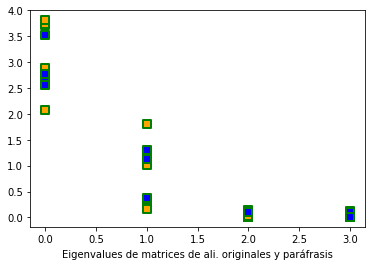

In [170]:

for i in range(len(lista_evectors)):
    if(i%2==0):
        color ="orange"
    else:
        color="blue"
    plt.scatter(x=np.arange(4),y=lista_evalues[i],c =color,
                linewidths = 2,
                marker ="s",
                edgecolor ="green",
                s = 50)
plt.xlabel("Eigenvalues de matrices de ali. originales y paráfrasis")

Text(0.5, 0, 'Eigenvalues originales de NOUN, VERB, ADV y ADJ')

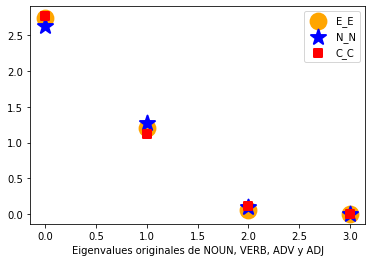

In [184]:
plt.scatter(x=np.arange(4),y=lista_evalues[0],c ="orange",
            linewidths = 2,
            marker ="o",
            edgecolor ="orange",
            s = 250)
plt.scatter(x=np.arange(4),y=lista_evalues[1],c ="blue",
            linewidths = 2,
            marker ="*",
            edgecolor ="blue",
            s = 250)
plt.scatter(x=np.arange(4),y=lista_evalues[9],c ="red",
            linewidths = 2,
            marker ="s",
            edgecolor ="red",
            s = 50)
plt.legend(['E_E','N_N','C_C'])
plt.xlabel("Eigenvalues originales de NOUN, VERB, ADV y ADJ")

Text(0.5, 0, 'Eigenvalues de NOUN, VERB, ADV y ADJ')

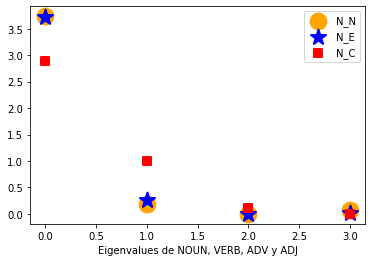

In [181]:
plt.scatter(x=np.arange(4),y=lista_evalues[4],c ="orange",
            linewidths = 2,
            marker ="o",
            edgecolor ="orange",
            s = 250)
plt.scatter(x=np.arange(4),y=lista_evalues[3],c ="blue",
            linewidths = 2,
            marker ="*",
            edgecolor ="blue",
            s = 250)
plt.scatter(x=np.arange(4),y=lista_evalues[6],c ="red",
            linewidths = 2,
            marker ="s",
            edgecolor ="red",
            s = 50)
plt.legend(['N_N','N_E','N_C'])
plt.xlabel("Eigenvalues de NOUN, VERB, ADV y ADJ")

Text(0.5, 0, 'Eigenvalues de NOUN, VERB, ADV y ADJ')

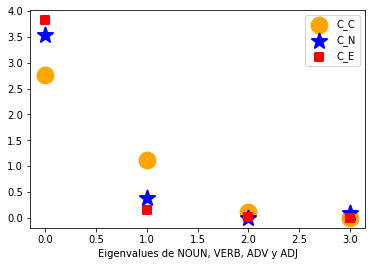

In [182]:
plt.scatter(x=np.arange(4),y=lista_evalues[9],c ="orange",
            linewidths = 2,
            marker ="o",
            edgecolor ="orange",
            s = 250)
plt.scatter(x=np.arange(4),y=lista_evalues[7],c ="blue",
            linewidths = 2,
            marker ="*",
            edgecolor ="blue",
            s = 250)
plt.scatter(x=np.arange(4),y=lista_evalues[8],c ="red",
            linewidths = 2,
            marker ="s",
            edgecolor ="red",
            s = 50)
plt.legend(['C_C','C_N','C_E'])
plt.xlabel("Eigenvalues de NOUN, VERB, ADV y ADJ")

In [ ]:
0['GPT2 - entailment_entailments - 0',
1 'GPT2 - entailment_entailments - 1',
2 'GPT2 - entailment_neutrals - 0',
3 'GPT2 - neutral_entailments - 0',
4 'GPT2 - neutral_neutrals - 0',
5 'GPT2 - neutral_neutrals - 1',
6 'GPT2 - neutral_contradictions - 0',
7 'GPT2 - contradiction_entailments - 0',
8 'GPT2 - contradiction_neutrals - 0',
9 'GPT2 - contradiction_contradictions - 1']